In [71]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
 
 #From updated functions.py from Canvas. Changed names on functions from previous version.
 
def softmax(x):
    """ Standard definition of the softmax function """
    return np.exp(x) / np.sum(np.exp(x), axis=0)


def LoadBatch(filename):
    """ Copied from the dataset website """
    with open('Datasets/' + filename, 'rb') as fo:
        dataset_dict = pickle.load(fo, encoding='bytes')
 
    return dataset_dict

def ComputeGradsNum(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    c = ComputeCost(X, Y, W, b, lamda)
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
        grad_b[i] = (c2 - c) / h
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
            grad_w[i, j] = (c2 - c) / h
 
    return [grad_w, grad_b]
 
 
def ComputeGradsNumSlow(X, Y, P, W, b, lamda, h):
    """ Converted from matlab code """
    no = W.shape[0]
    # d = X.shape[0]
 
    grad_w = np.zeros(W.shape)
    grad_b = np.zeros((no, 1))
 
    for i in range(len(b)):
        b_try = np.array(b)
        b_try[i] -= h
        c1 = ComputeCost(X, Y, W, b_try, lamda)
 
        b_try = np.array(b)
        b_try[i] += h
        c2 = ComputeCost(X, Y, W, b_try, lamda)
 
        grad_b[i] = (c2 - c1) / (2 * h)
 
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w_try = np.array(W)
            w_try[i, j] -= h
            c1 = ComputeCost(X, Y, w_try, b, lamda)
 
            w_try = np.array(W)
            w_try[i, j] += h
            c2 = ComputeCost(X, Y, w_try, b, lamda)
 
            grad_w[i, j] = (c2 - c1) / (2 * h)
 
    return [grad_w, grad_b]
 
 
def montage(W):
    """ Display the image for each label in W """
    fig, ax = plt.subplots(2, 5)
    for i in range(2):
        for j in range(5):
            im = W[i * 5 + j, :].reshape(32, 32, 3, order='F')
            sim = (im - np.min(im[:])) / (np.max(im[:]) - np.min(im[:]))
            sim = sim.transpose(1, 0, 2)
            ax[i][j].imshow(sim, interpolation='nearest')
            ax[i][j].set_title("y=" + str(5 * i + j))
            ax[i][j].axis('off')
    plt.show()
 
 
def save_as_mat(data, name="model"):
    """ Used to transfer a python model to matlab """
    import scipy.io as sio
    sio.savemat(f'{name}.mat', {"name": "b"})




In [72]:

def load(filename):
    data = LoadBatch(filename)
    
    X = data[b'data'].astype(np.float32).reshape(-1, 3072).T / 255
    y = np.array(data[b'labels']).astype(np.int32)
    
    Y = np.zeros((10, y.shape[0]), dtype=np.float32)
    for i, label in enumerate(y):
        Y[label, i] = 1
    
    return X, Y, y + 1

def normalize_data(train, validation, test):
    # Compute the mean and standard deviation of the training data
    train_mean = np.mean(train, axis=1, keepdims=True)
    train_std = np.std(train, axis=1, keepdims=True)

    # Normalize the training, validation and test data
    train_norm = (train - train_mean) / train_std
    validation_norm = (validation - train_mean) / train_std
    test_norm = (test - train_mean) / train_std

    return train_norm, validation_norm, test_norm



In [105]:
# 2.1
train_X, train_Y, train_y = load('data_batch_1')
val_X, val_Y, val_y = load('data_batch_2')
test_X, test_Y, test_y = load('test_batch')

train_X_norm, val_X_norm, test_X_norm = normalize_data(train_X, val_X, test_X)

def initialize_parameters(K, d, m):
    W1 = np.random.randn(m, d) * (1 / np.sqrt(d))
    b1 = np.zeros((m, 1))
    W2 = np.random.randn(K, m) * (1 / np.sqrt(m))
    b2 = np.zeros((K, 1))
    return W1, b1, W2, b2


def forward_pass(X, W1, b1, W2, b2):
    S1 = np.dot(W1, X) + b1
    H = np.maximum(0, S1)
    S = np.dot(W2, H) + b2
    P = softmax(S)
    return H, P

K = 10
m = 50
d = 3072


W1, b1, W2, b2 = initialize_parameters(K, d, m)


In [107]:
#2.2
def ComputeCost(X, Y, W1, b1, W2, b2, lamda):
    H, P = forward_pass(X, W1, b1, W2, b2)
    loss = -np.mean(np.sum(Y * np.log(P), axis=0))
    reg = lamda * (np.sum(W1 * W1) + np.sum(W2 * W2))
    cost = loss + reg

    return cost, loss

def compute_accuracy(X, y, W1, b1, W2, b2):
    # Compute the scores
    _, P = forward_pass(X, W1, b1, W2, b2)

    # Compute the predicted labels
    y_pred = np.argmax(P, axis=0) + 1

    # Compute the accuracy
    accuracy = np.mean(y == y_pred)

    return accuracy



"""def compute_gradients_num_slow(X,Y, W1, b1, W2, b2, lambda_, h):
    grad_W1 = np.zeros(W1.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_W2 = np.zeros(W2.shape)
    grad_b2 = np.zeros(b2.shape)


    #W1
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1_ = np.array(W1)
            W1_[i,j] -= h
            c1,_ = ComputeCost(X, Y, W1_, b1, W2, b2, lambda_)
            
            W1_ = np.array(W1)
            W1_[i,j] += h
            c2 ,_= ComputeCost(X, Y, W1_, b1, W2, b2, lambda_)
            grad_W1[i,j] = (c2 - c1) / (2*h)


    #b1
    for i in range(len(b1)):
        b1_ = np.array(b1)
        b1_[i] -= h
        c1,_ = ComputeCost(X, Y, W1, b1_, W2, b2, lambda_)
            
        b1_ = np.array(b1)
        b1_[i] += h
        c2, _ = ComputeCost(X, Y, W1, b1_, W2, b2, lambda_)
        grad_b1[i] = (c2 - c1) / (2*h)



    #W2
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2_ = np.array(W2)
            W2_[i,j] -= h
            c1, _ = ComputeCost(X, Y, W1, b1, W2_, b2, lambda_)
            
            W2_ = np.array(W2)
            W2_[i,j] += h
            c2, _ = ComputeCost(X, Y, W1, b1, W2_, b2, lambda_)
            grad_W2[i,j] = (c2 - c1) / (2*h)
    
    #b2
    for i in range(len(b2)):
        b2_ = np.array(b2)
        b2_[i] -= h
        c1, _ = ComputeCost(X, Y, W1, b1, W2, b2_, lambda_)
            
        b2_ = np.array(b2)
        b2_[i] += h
        c2, _ = ComputeCost(X, Y, W1, b1, W2, b2_, lambda_)
        grad_b2[i] = (c2 - c1) / (2*h)

    return grad_W1, grad_b1, grad_W2, grad_b2

def compute_gradients(X, Y, W1, b1, W2, b2, lambda_):
    H, P = forward_pass(X, W1, b1, W2, b2)
    N = X.shape[1]
    
    g = P - Y
    grad_W2 = (1 / N) * np.dot(g, H.T) + 2 * lambda_ * W2
    grad_b2 = (1 / N) * np.sum(g, axis=1, keepdims=True)

    g = np.dot(W2.T, g)
    g[H <= 0] = 0
    
    grad_W1 = (1 / N) * np.dot(g, X.T) + 2 * lambda_ * W1
    grad_b1 = (1 / N) * np.sum(g, axis=1, keepdims=True)
    return grad_W1, grad_b1, grad_W2, grad_b2

def compute_gradients(X, Y, W1, b1, W2, b2, lamda):
    H, P = forward_pass(X, W1, b1, W2, b2)
    num_samples = X.shape[1]
    G = -(Y - P)
    grad_W2 = np.matmul(G, H.T) / num_samples + 2 * lamda * W2
    grad_b2 = np.sum(G, axis=1).reshape(-1, 1) / num_samples

    G = np.matmul(W2.T, G)
    G[H <= 0.0] = 0.0
    grad_W1 = np.matmul(G, X.T) / num_samples + 2 * lamda * W1
    grad_b1 = np.sum(G, axis=1).reshape(-1, 1) / num_samples
    return grad_W1, grad_b1, grad_W2, grad_b2



def compute_gradients_num_slow(X, Y, w1, b1, w2, b2, lamda, h=1e-6):
    grad_w1 = np.zeros(w1.shape)
    grad_w2 = np.zeros(w2.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_b2 = np.zeros(b2.shape)

    c, _ = ComputeCost(X, Y, w1, b1, w2, b2, lamda)

    for i in range(len(b1)):
        b1[i] += h
        c2, _ = ComputeCost(X, Y, w1, b1, w2, b2, lamda)
        grad_b1[i] = (c2 - c) / h
        b1[i] -= h

    for i in range(len(b2)):
        b2[i] += h
        c2 , _= ComputeCost(X, Y, w1, b1, w2, b2, lamda)
        grad_b2[i] = (c2 - c) / h
        b2[i] -= h

    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            w1[i][j] += h
            c2 , _= ComputeCost(X, Y, w1, b1, w2, b2, lamda)
            grad_w1[i][j] = (c2 - c) / h
            w1[i][j] -= h

    for i in range(w2.shape[0]):
        for j in range(w2.shape[1]):
            w2[i][j] += h
            c2 , _= ComputeCost(X, Y, w1, b1, w2, b2, lamda)
            grad_w2[i][j] = (c2 - c) / h
            w2[i][j] -= h

    return grad_w1, grad_b1, grad_w2, grad_b2"""





def compute_gradients_num(X,Y, W1, b1, W2, b2, lambda_, h):
    grad_W1 = np.zeros(W1.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_W2 = np.zeros(W2.shape)
    grad_b2 = np.zeros(b2.shape)


    #W1
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1_ = np.array(W1)
            W1_[i,j] -= h
            c1 = ComputeCost(X, Y, W1_, b1, W2, b2, lambda_)[0]
            
            W1_ = np.array(W1)
            W1_[i,j] += h
            c2 = ComputeCost(X, Y, W1_, b1, W2, b2, lambda_)[0]
            grad_W1[i,j] = (c2 - c1) / (2*h)

    #b1
    for i in range(len(b1)):
        b1_ = np.array(b1)
        b1_[i] -= h
        c1 = ComputeCost(X, Y, W1, b1_, W2, b2, lambda_)[0]
            
        b1_ = np.array(b1)
        b1_[i] += h
        c2 = ComputeCost(X, Y, W1, b1_, W2, b2, lambda_)[0]
        grad_b1[i] = (c2 - c1) / (2*h)


    #W2
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2_ = np.array(W2)
            W2_[i,j] -= h
            c1 = ComputeCost(X, Y, W1, b1, W2_, b2, lambda_)[0]
            
            W2_ = np.array(W2)
            W2_[i,j] += h
            c2 = ComputeCost(X, Y, W1, b1, W2_, b2, lambda_)[0]
            grad_W2[i,j] = (c2 - c1) / (2*h)
    
    #b2
    for i in range(len(b2)):
        b2_ = np.array(b2)
        b2_[i] -= h
        c1 = ComputeCost(X, Y, W1, b1, W2, b2_, lambda_)[0]
            
        b2_ = np.array(b2)
        b2_[i] += h
        c2 = ComputeCost(X, Y, W1, b1, W2, b2_, lambda_)[0]
        grad_b2[i] = (c2 - c1) / (2*h)

    return grad_W1, grad_b1, grad_W2, grad_b2

def compute_gradients(X, Y, W1, b1, W2, b2, lambda_):
    H, P = forward_pass(X, W1, b1, W2, b2)
    N = X.shape[1]
    
    g = P - Y
    grad_W2 = (1 / N) * np.dot(g, H.T) + 2 * lambda_ * W2
    grad_b2 = (1 / N) * np.sum(g, axis=1, keepdims=True)

    g = np.dot(W2.T, g)
    g[H <= 0] = 0
    
    grad_W1 = (1 / N) * np.dot(g, X.T) + 2 * lambda_ * W1
    grad_b1 = (1 / N) * np.sum(g, axis=1, keepdims=True)
    return grad_W1, grad_b1, grad_W2, grad_b2

   





In [83]:
X_small = train_X_norm[:, :100]
Y_small = train_Y[:, :100]
lambda_ = 0
# Compute the analytical gradients
grad_W1_analytical, grad_b1_analytical, grad_W2_analytical, grad_b2_analytical = compute_gradients(X_small, Y_small, W1, b1, W2, b2, lambda_)

# Compute the numerical gradients
grad_W1_numerical, grad_b1_numerical, grad_W2_numerical, grad_b2_numerical = compute_gradients_num(X_small, Y_small, W1, b1, W2, b2, lambda_, h=1e-6)

# Compute the relative error
eps = 1e-10
relative_error_W1 = np.abs(grad_W1_analytical - grad_W1_numerical) / np.maximum(eps, np.abs(grad_W1_analytical) + np.abs(grad_W1_numerical))
relative_error_W2 = np.abs(grad_W2_analytical - grad_W2_numerical) / np.maximum(eps, np.abs(grad_W2_analytical) + np.abs(grad_W2_numerical))

relative_error_b1 = np.abs(grad_b1_analytical - grad_b1_numerical) / np.maximum(eps, np.abs(grad_b1_analytical) + np.abs(grad_b1_numerical))
relative_error_b2 = np.abs(grad_b2_analytical - grad_b2_numerical) / np.maximum(eps, np.abs(grad_b2_analytical) + np.abs(grad_b2_numerical))


print("Relative error W1:", np.max(relative_error_W1))
print("Relative error W2:", np.max(relative_error_W2))
print("Relative error b1:", np.max(relative_error_b1))
print("Relative error b2:", np.max(relative_error_b2))



Relative error W1: 0.05361080240187241
Relative error W2: 3.6797744657760817e-07
Relative error b1: 9.991900377577628e-08
Relative error b2: 2.327969694438166e-08


Final training cost: 0.004799294676831495
Final validation cost: 3.5809453910815368


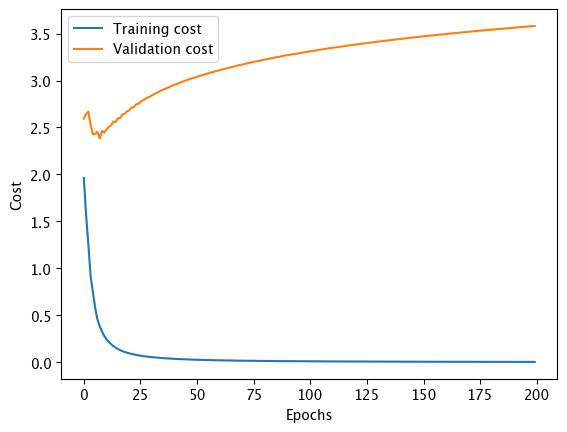

In [38]:

def mini_train(X, Y, X_validation, Y_validation, GD_params, W1, b1, W2, b2, lambda_):
    # Initialize the parameters
    n_batch, eta, n_epochs = GD_params
    n = X.shape[1]
    train_cost = []
    validation_cost = []

    for n_epochs in range(n_epochs):
        for j in range(n // n_batch):
            j_start = j * n_batch
            j_end = (j + 1) * n_batch
            indices = slice(j_start, j_end)
            X_batch = X[:, indices]
            Y_batch = Y[:, indices]

            grad_W1, grad_b1, grad_W2, grad_b2 = compute_gradients(X_batch, Y_batch, W1, b1, W2, b2, lambda_)

            W1 -= eta * grad_W1
            b1 -= eta * grad_b1
            W2 -= eta * grad_W2
            b2 -= eta * grad_b2

        # Compute the cost
        train_cost.append(ComputeCost(X, Y, W1, b1, W2, b2, lambda_)[0])
        validation_cost.append(ComputeCost(X_validation, Y_validation, W1, b1, W2, b2, lambda_)[0])
	
    return W1, b1, W2, b2, train_cost, validation_cost


# sanity check
GD_params = (100, 0.1, 200)
X_validation_norm = val_X_norm[:, :100]
Y_validation = val_Y[:, :100]
W1, b1, W2, b2, train_cost, validation_cost = mini_train(X_small, Y_small, X_validation_norm, Y_validation, GD_params, W1, b1, W2, b2, lambda_)

print("Final training cost:", train_cost[-1])
print("Final validation cost:", validation_cost[-1])

#plot the training and validation cost
plt.plot(train_cost, label='Training cost')
plt.plot(validation_cost, label='Validation cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

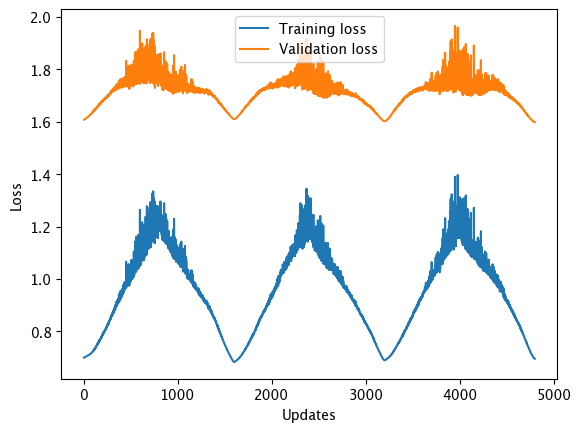

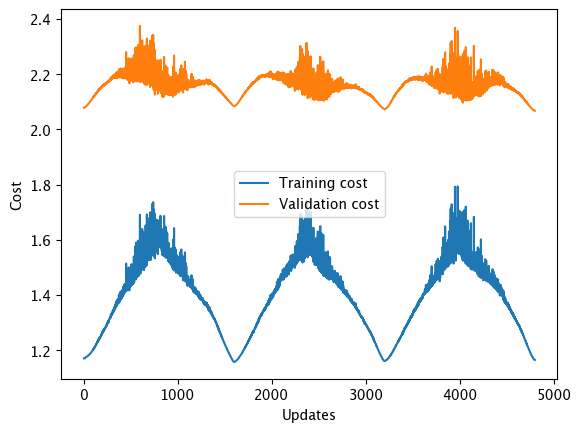

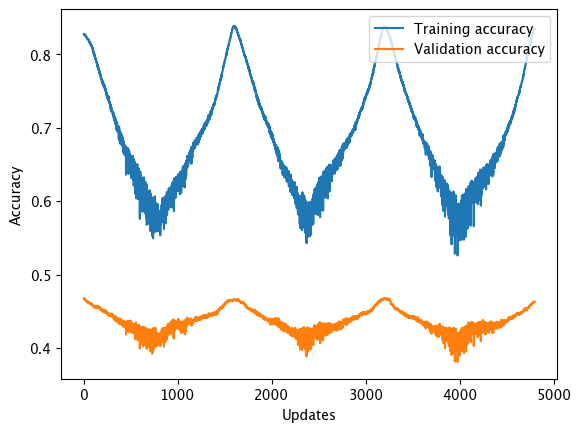

In [44]:
# Assignment 2.3

# Implement the 2-layer neural network mini-batch gradient descent
def train_network_cyclical(X_train, Y_train, X_val, Y_val, W1, b1, W2, b2, lambda_, n_batch, eta_min, eta_max, n_s, n_epochs, y_train, y_val, X_test, y_test):
    train_losses = []
    val_losses = []
    train_costs = []
    val_costs = []

    test_accs = []
    train_accs = []

    t = 1
    eta_history = []
    update_step_history = []


    num_steps = X_train.shape[1] // n_batch

    for epoch in range(n_epochs):
        for j in range(int(num_steps)):
            t = t % (2 * n_s)  
            # cyclic learning rate
            if t <= n_s:
                eta = eta_min + (t / n_s) * (eta_max - eta_min)
            else:
                eta = eta_max - ((t - n_s) / n_s) * (eta_max - eta_min)

            j_start = j * n_batch
            j_end = (j + 1) * n_batch
            indices = slice(j_start, j_end)
            X_batch = X_train[:, indices]
            Y_batch = Y_train[:, indices]
            grad_W1, grad_b1, grad_W2, grad_b2 = compute_gradients(X_batch, Y_batch, W1, b1, W2, b2, lambda_)

            W1 -= eta * grad_W1
            b1 -= eta * grad_b1
            W2 -= eta * grad_W2
            b2 -= eta * grad_b2

            eta_history.append(eta)
            update_step_history.append(j)


        # Calculate and store the costs at every update step
        if n_epochs % 10 == 0:

            cost_train, _ = ComputeCost(X_train, Y_train, W1, b1, W2, b2, lambda_)
            cost_val, _= ComputeCost(X_val, Y_val, W1, b1, W2, b2, lambda_)
            train_costs.append(cost_train)
            val_costs.append(cost_val)

            _, loss_train = ComputeCost(X_train, Y_train, W1, b1, W2, b2, lambda_)
            _, loss_val = ComputeCost(X_val, Y_val, W1, b1, W2, b2, lambda_)
            train_losses.append(loss_train)
            val_losses.append(loss_val)


            train_accuracy = compute_accuracy(X_train, y_train, W1, b1, W2, b2)
            train_accs.append(train_accuracy)
            test_accuracy = compute_accuracy(X_test, y_test, W1, b1, W2, b2)
            test_accs.append(test_accuracy)
        
        t += 1






    
        #print("Epoch {}/{}: Test accuracy: {:.4f}".format(epoch + 1, n_epochs, test_accuracy))
        #print("Epoch {}/{}: Val accuracy: {:.4f}".format(epoch + 1, n_epochs, train_accuracy))
    return W1, b1, W2, b2, train_losses, val_losses, train_costs, val_costs, train_accs, test_accs, eta_history, update_step_history

n = train_X_norm.shape[1]
n_batch = 100
eta_min = 1e-5 
eta_max = 1e-1
n_s = 800
n_epochs = 2*n_s
lambda_ = 0.01
W1, b1, W2, b2, train_losses, val_losses, train_costs, val_costs, train_accs, test_accs, eta_history, update_step_history = train_network_cyclical(train_X_norm, train_Y, val_X_norm, val_Y, W1, b1, W2, b2, lambda_, n_batch, eta_min, eta_max, n_s, n_epochs, train_y, val_y, test_X_norm, test_y)



plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Plot the training and validation cost
plt.plot(train_costs, label='Training cost')
plt.plot(val_costs, label='Validation cost')
plt.xlabel('Updates')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_accs, label='Training accuracy')
plt.plot(test_accs, label='Validation accuracy')
plt.xlabel('Updates')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Print the final training loss
#print("Final training loss:", train_losses[-1])


In [45]:
N = train_X_norm.shape[1]
print(N)
print((N // n_batch))

#print accuracy
print("Final training accuracy:", train_accs[-1])
print("Final validation accuracy:", test_accs[-1])

10000
100
Final training accuracy: 0.8338
Final validation accuracy: 0.463


In [84]:
# exercise 2.4

# Have to change for distinct users with dataset stored elsewhere, dataset up until coarse-to-fine random search:
train_file = 'data_batch_1'
train_file2 = 'data_batch_2'
train_file3 = 'data_batch_3'
train_file4 = 'data_batch_4'
train_file5 = 'data_batch_5'

test_file = 'test_batch'

train_X, train_Y, train_y = load(train_file)
train_X2, train_Y2, train_y2 = load(train_file2)
train_X3, train_Y3, train_y3 = load(train_file3)
train_X4, train_Y4, train_y4 = load(train_file4)
train_X5, train_Y5, train_y5 = load(train_file5)
#val_X, val_Y, val_y = load_batch(val_file)
test_X, test_Y, test_y = load(test_file)

#Exercise 4, load data
E4_X=np.hstack((train_X,train_X2,train_X3,train_X4,train_X5))
E4_Y=np.hstack((train_Y,train_Y2,train_Y3,train_Y4,train_Y5))
E4_y=np.hstack((train_y,train_y2,train_y3,train_y4,train_y5))


Xva=E4_X[0:,0:1000]
Yva=E4_Y[0:,0:1000]
yva=E4_y[0:1000]
Xtr=E4_X[0:,1000:]
Ytr=E4_Y[0:,1000:]
ytr=E4_y[1000:]

# normalize data

Xtr_norm, Xva_norm, Xte_norm = normalize_data(Xtr, Xva, test_X)

# initialize parameters
K = 10
m = 50
d = 3072

W1, b1, W2, b2 = initialize_parameters(K, d, m)

import random


def random_search(train_X_norm, train_Y, train_y, val_X_norm, val_Y, val_y, W1, b1, W2, b2, lamda, lamda_range, n_batch, eta_min, eta_max, n_s, n_epochs):

    lamda_performances = []

    for lamda in lamda_range:
        

        W1, b1, W2, b2, train_losses, val_losses, train_costs, val_costs, train_accs, test_accs, eta_history, update_step_history = train_network_cyclical(
            train_X_norm, train_Y, val_X_norm, val_Y, W1, b1, W2, b2, lamda, n_batch, eta_min, eta_max, n_s, n_epochs, train_y, val_y, test_X_norm, test_y)


        lamda_performances.append((lamda, test_accs[-1]))

    return sorted(lamda_performances, key=lambda x: x[1], reverse=True)


#course find random search
n_s = 2 * (n // n_batch)
l_min = -5
l_max = -1
lamda_range = np.logspace(l_min, l_max, num=10, base=10)

n_epochs = 10
lamda_performances = random_search(train_X_norm, train_Y, train_y, val_X_norm, val_Y, val_y, W1, b1, W2, b2, lambda_, lamda_range, n_batch, eta_min, eta_max, n_s, n_epochs)




In [110]:
print(lamda_range)

[1.00000000e-05 2.78255940e-05 7.74263683e-05 2.15443469e-04
 5.99484250e-04 1.66810054e-03 4.64158883e-03 1.29154967e-02
 3.59381366e-02 1.00000000e-01]


In [85]:
print("Random search results:")
for r in lamda_performances:
    print("Lambda: {:.10f}, Test accuracy: {:.4f}".format(r[0], r[1]))

Random search results:
Lambda: 0.0359381366, Test accuracy: 0.4518
Lambda: 0.0000100000, Test accuracy: 0.4216
Lambda: 0.0129154967, Test accuracy: 0.4206
Lambda: 0.0000278256, Test accuracy: 0.4194
Lambda: 0.0000774264, Test accuracy: 0.4090
Lambda: 0.1000000000, Test accuracy: 0.4028
Lambda: 0.0002154435, Test accuracy: 0.4020
Lambda: 0.0046415888, Test accuracy: 0.3973
Lambda: 0.0016681005, Test accuracy: 0.3941
Lambda: 0.0005994843, Test accuracy: 0.3940


In [86]:
# best lamda

best_lamda = lamda_performances[0][0]
fine_lamdas = np.linspace(best_lamda - best_lamda * 1e-1, best_lamda + best_lamda * 1e-1, num=10)

# fine search random search
n_s = 2 * (n // n_batch)
n_epochs = 10
lamda_fines = random_search(train_X_norm, train_Y, train_y, val_X_norm, val_Y, val_y, W1, b1, W2, b2, lambda_, fine_lamdas, n_batch, eta_min, eta_max, n_s, n_epochs)

    



KeyboardInterrupt: 

In [111]:
print(fine_lamdas)

[0.03234432 0.03314295 0.03394157 0.0347402  0.03553882 0.03633745
 0.03713607 0.0379347  0.03873333 0.03953195]


In [ ]:
print("Random search results:")
for r in lamda_fines:
    print("Lambda: {:.10f}, Test accuracy: {:.4f}".format(r[0], r[1]))

Random search results:
Lambda: 0.0355388240, Test accuracy: 0.4548
Lambda: 0.0363374493, Test accuracy: 0.4545
Lambda: 0.0371360745, Test accuracy: 0.4537
Lambda: 0.0347401988, Test accuracy: 0.4535
Lambda: 0.0379346998, Test accuracy: 0.4531
Lambda: 0.0339415735, Test accuracy: 0.4529
Lambda: 0.0387333250, Test accuracy: 0.4525
Lambda: 0.0395319503, Test accuracy: 0.4509
Lambda: 0.0331429482, Test accuracy: 0.4505
Lambda: 0.0323443230, Test accuracy: 0.4455


In [108]:
# run network with best lamda setting 
W1, b1, W2, b2 = initialize_parameters(K, d, m)

W1 = np.random.normal(0, 0.01, (50, 3072))
W2 = np.random.normal(0, 0.01, (10, 50))
b1 = np.zeros((50, 1))
b2 = np.zeros((10, 1))

best_lamda = 0.0355388240
n_batch = 100
eta_min = 1e-5
eta_max = 1e-1

n_s = 2 * (n // n_batch)

n_epochs = 10
W1, b1, W2, b2, train_losses, val_losses, train_costs, val_costs, train_accs, test_accs, eta_history, update_step_history = train_network_cyclical(
    Xtr_norm, Ytr, Xva_norm, Yva, W1, b1, W2, b2, best_lamda, n_batch, eta_min, eta_max, n_s, n_epochs, ytr, yva, Xte_norm, test_y)


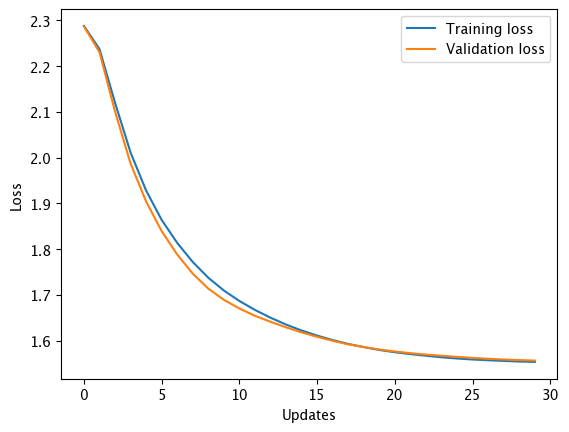

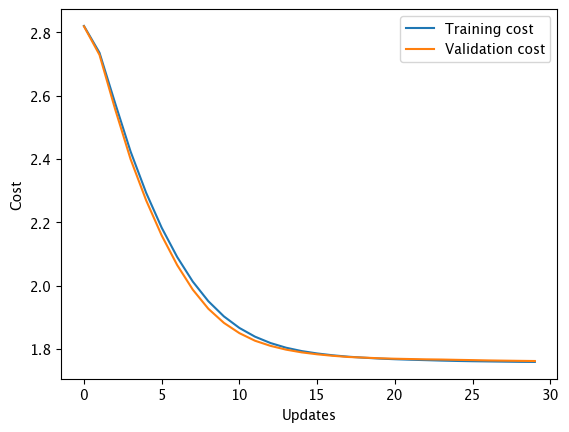

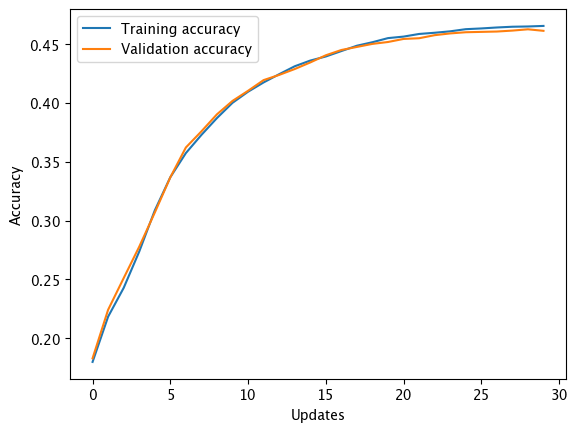

In [109]:
# plot losses, costs and accuracies

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_costs, label='Training cost')
plt.plot(val_costs, label='Validation cost')
plt.xlabel('Updates')
plt.ylabel('Cost')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training accuracy')
plt.plot(test_accs, label='Validation accuracy')
plt.xlabel('Updates')
plt.ylabel('Accuracy')
plt.legend()
plt.show()